In [1]:
from elastML.features import FeaExtraction
from elastML.predict import model_predict

# material project ids

In [2]:
ids = ["mp-1007666","mp-10212","mp-66","mp-108"]

# extract features from the structures

In [3]:
api_key = "Esc2lnMk6K1iNVBEx0"

materials_id = {"material_id":{"$in":ids}}

fea = FeaExtraction(
                 materials_id,
                 api_key
                )

/global/cfs/cdirs/m3560/suvo/anaconda3/lib/python3.10/site-packages/pymatgen/ext/matproj.py:185: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


StrToComposition:   0%|          | 0/4 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/4 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/4 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/4 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/4 [00:00<?, ?it/s]

# Generate scaled data for pretrained models

Pretrained models are trained on 150 features selected based on precomputed mRMR feature relevance, as described in the paper https://doi.org/10.26434/chemrxiv-2023-07vcr

In [4]:

predict_transform, target =fea.get_predict_data(
                                                feature_relevance ='mrmr_precomputed',
                                                target="Bulk",  # or "Shear"
                                                n_features=150,
                                            )


# Prediction with pretrained ML models

Available options 'LR', 'KNN', 'SVR', 'GPR', 'RF', 'GBM', 'KRR', 'MLP'

In [5]:
predict = model_predict(
              predict_transform, 
              target, 
              prop="Bulk",  # or "Shear"
              model_name="SVR",
              print_mae=True)

mae error: 1.0881069612434047 GPa


Text(0, 0.5, 'target')

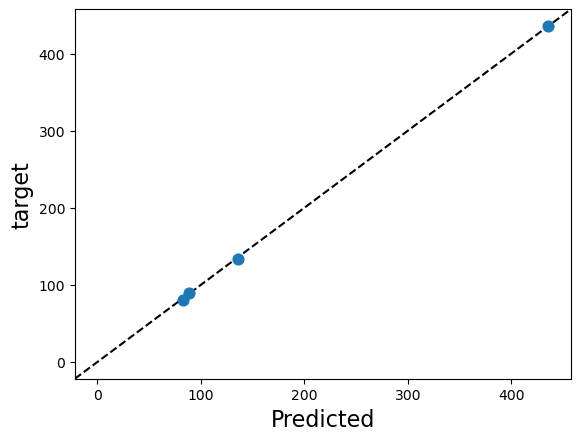

In [6]:
import matplotlib.pyplot as plt

plt.scatter(predict,target,s=60)
ax= plt.gca()
ax.axline([0, 0], [1, 1],zorder=0,linestyle="dashed",color="k")
plt.xlabel("Predicted",size=16)
plt.ylabel("target",size=16)